# ECON 8185 - HW 2

João Lazzaro - santo279@umn.edu

Incomplete Version

## Question 1

We'll consider the following Prototype model from Ellen's Homework 2, which is the same as CKM:

$$\max_{c_t,x_t,l_t} E \sum_{t=0}^\infty \beta^t \frac{\left(c_tl_t^\psi\right)^{1-\sigma}}{1-\sigma} N_t$$
S.T. 
$$ c_t +(1+\tau_{xt}x_t =r_t k_t +(1-\tau_{ht})w_t h_t + T_t$$
$$ N_{t+1} k_{t+1} = [(1-\delta)k_t+x_t]N_t$$
$$h_t+l_t =1$$
$$S_t = P S_{t-1}+Q\epsilon_t,\;\;S_t = [\ln z_t,\tau_{ht},\tau_{xt}, \ln g_t]$$
$$ c_t,x_t\geq0$$

Where $N_t = (1+\gamma_n)^t$ and firm tecnhology is $Y_t = K_t^\theta (Z_t L_t)^{1-\theta}$. $\gamma_z$ is the rate of labor-augmenting technical progress. The stochastic shocks hitting this economy affect technology, tax rates, and government spending and the stochastic processes are modeled as a VAR(1) process. The resource constraint is $Y_t=N_t(c_t +x_t +g_t)$. We must work with detrended variables, we should use "hat" variables, but typing this is time consuming so from now on all variables should be understood as detrended unless I say something about them.

The detrended FOC's of this model are:

$$c_t+(1+\gamma_z)(1+\gamma_n)k_{t+1} - (1-\delta)k_t+g_t = y_t =k_t^\theta(z_th_t)^{1-\theta}$$
$$\psi \frac{c_t}{1-h_t} = (1-\tau_{ht})(1-\theta)\left(\frac{k_t}{h_t}\right)^\theta z_t^{1-\theta}$$
$$c_t^{-\sigma}(1-h_t)^{\psi(1-\sigma)} (1+\tau_{xt})=\beta(1+\gamma_z)^{-\sigma}E_t c_{t+1}^{-\sigma} (1- h_{t+1})^{\psi(1-\sigma)}\left(\theta k_{t+1}^{\theta}(z_{t+1} h_{t+1})^{1-\theta} + (1-\delta)(1+\theta_{xt+1})\right)$$

Defining some parameters:

In [64]:
#Parameters:
δ = 1   #depreciation rate
θ = 1/3  #capital share of output
β = 0.9  #Discouting
σ = 2  #Elasticity of Intertemporal Substitution
ψ = 1    #Labor parameter
γn= 0.00    #Population growth rate
γz= 0.00   #Productivitu growth rate
gss = 0.02 #average g
τxss = 0.02 #average τx
τhss = 0.03 #average τh
zss = 1 #average z

#Parameters to be estimated
ρg = 0.0
ρx = 0.0
ρh = 0.0
ρz = 0.8
σg= 0.025
σx = 0.02
σz = 0.01
σh = 0.03

0.03

Substituting for $c$, we get an euqation for $k$, and one for $h$. Below, I find the Steady State values:


In [65]:
#Function with the FOCs
function SS!(eq, vector::Vector)
    k,h = (vector)
    k1 = k
    h1 = h
    g, τx,τh, z = gss,τxss,τhss, zss
    z1 = z
    τx1 = τx

    c = k * ((z *h)^(1-θ))^(1/θ) - ((1+γz)*(1+γn)*k1-(1-δ)*k+g)^(1/θ) 
    c1 = c
    eq[1] = (ψ *c)^(1/θ)  - (k/h)*((1-h)*(1-τh)*(1-θ)*z^(1-θ))^(1/θ) 

    eq[2] = (c^(-σ) *(1-h)^(ψ*(1-σ))*(1+τx)  - (1-δ)*(1+τx1)* β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)))^(-1/θ) -
     (β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)) * θ*(z1*h1)^(1-θ))^(-1/θ)* k1
    return eq
end

SteadyState = nlsolve(SS!, [0.2,0.8],ftol = :1.0e-20, method = :trust_region , autoscale = true)
kss,hss = SteadyState.zero

2-element Array{Float64,1}:
 0.05412761744776807
 0.8500964718247656 

Log-linearizing the equations we get the following system of equations:


$$ 0 = E_t[a_1\tilde{k}_t +a_2\tilde{k}_{t+1}+a_3\tilde{h}_t+a_4 \tilde{z}_t + a_5 \tilde{\tau}_{ht} +a_6 \tilde{g}_t] $$
$$ 0 = E_t[b_1\tilde{k}_t +b_2\tilde{k}_{t+1}+b_3\tilde{k}_{t+2}+b_4 \tilde{h}_t + b_5 \tilde{h}_{t+1} b_6 \tilde{z}_t +b_7 \tilde{\tau}_{xt} +b_8 \tilde{g}_t + b_9 \tilde{z}_{t+1} +b_{10} \tau_{xt+1}+b_{11}\tilde{g}_{t+1}]  $$

Where tilde variables are log deviations from Steady State. Stacking up the equations we get:
$$0 = E_t \begin{bmatrix}
    1       & 0 & 0  \\
    0       & 0 & 0  \\
    0       & b_3 & b_5 
\end{bmatrix}
\begin{bmatrix}
    \tilde{k}_{t+1}\\
    \tilde{k}_{t+2}\\
    \tilde{h}_{t+1}        
\end{bmatrix} + \begin{bmatrix}
    0       & -1 & 0  \\
    a_1       & a_2 & a_3  \\
    b_1       & b_2 & b_4 
\end{bmatrix}
\begin{bmatrix}
    \tilde{k}_{t}\\
    \tilde{k}_{t+1}\\
    \tilde{h}_{t}        
\end{bmatrix} + \begin{bmatrix}
    0       & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
    a_4       & a_5 & 0 & a_6 &0&0&0&0  \\
    b_6       & 0 & b_7 & b_8 & b_9 & 0 &b_{10} & b_{11} 
\end{bmatrix}\begin{bmatrix}
    S_t\\
    S_{t+1}        
\end{bmatrix}$$
We call the first matrix $A_1$, and the second $A_2$. The code below log-linearizes and find these matrices:

In [68]:
function loglineq1(vector::Vector)
    k,k1,h,z,τh,g= vector

    c = k^θ * (z *h)^(1-θ) - ((1+γz)*(1+γn)*k1-(1-δ)*k+g)
    eq = ψ *c - (1-τh)*(1-θ) *(k/h)^θ *z^(1-θ)*(1-h)

    return eq
end
function loglineq2(vector::Vector)
    k,k1,k2,h,h1,z,τx,g,z1,τx1,g1 = (vector)
    c = k^θ * (z *h)^(1-θ) - ((1+γz)*(1+γn)*k1-(1-δ)*k+g)
    c1 = k1^θ * (z1 *h1)^(1-θ) - ((1+γz)*(1+γn)*k2-(1-δ)*k1+g1)
    eq = c^(-σ) *(1-h)^(ψ*(1-σ))*(1+τx)  -  β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)) *(θ*k1^(-θ)*(z1*h1)^(1-θ)+(1-δ)*(1+τx1))
    return eq
end


#log deviations
T=ForwardDiff.gradient(loglineq1,[kss,kss,hss,zss,τhss,gss])
a =[-kss*T[1]/(kss*T[1]),-kss*T[2]/(kss*T[1]),-hss*T[3]/(kss*T[1]),
-zss*T[4]/(kss*T[1]),-τhss*T[5]/(kss*T[1]),-gss*T[6]/(kss*T[1])]
if ψ==0
    a[1],a[2:end]=-1,zeros(5)
end

T=ForwardDiff.gradient(loglineq2,[kss,kss,kss,hss,hss,zss,τxss,gss,zss,τxss,gss])
b = [kss*T[1]/(-kss*T[1]),kss*T[2]/(-kss*T[1]),kss*T[3]/(-kss*T[1]),hss*T[4]/(-kss*T[1]),
hss*T[5]/(-kss*T[1]),zss*T[6]/(-kss*T[1]),τxss*T[7]/(-kss*T[1]),gss*T[8]/(-kss*T[1]),
zss*T[9]/(-kss*T[1]),τxss*T[10]/(-kss*T[1]),gss*T[11]/(-kss*T[1])]

A1 = [1 0 0; 0 0 0; 0 b[3] b[5]]
A2 = [0 -1 0; a[1] a[2] a[3]; b[1] b[2] b[4]]
U = [0 0 0 0 0 0 0 0;
a[4] a[5] 0 a[6] 0 0 0 0;
b[6] 0 b[7] b[8] b[9] 0 b[10] b[11]]

A1,A2

([1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 -0.333771 -3.78908], [0.0 -1.0 0.0; -1.0 0.539929 -4.57582; -1.0 1.44879 4.64888])

In [63]:
T[1]

0.0

We look for a solution of the form: $$\tilde{k}_{t+1} = A \tilde{k}_t +BS_t $$ $$ Z_t = C X_t + D S_t $$ $$S_t = P S_{t-1} + Q \epsilon_t$$
Where $Z_t = [\tilde{k}_{t+1},\tilde{h}_t]'$ and $S_t$ are the stochastic exogenous variables. We compute the generalized eigenvalues and eigenvectors for matrices $A_1$ and $−A_2$ because $A_1$ is not invertible. Thus, $A_2 V = -A_1 V \Pi$ and we can get $A$ and $C$ by:
$$A = V_{11} \Pi_{1,1} V_{1,1}^{-1}$$
 $$C = V_{2,1}V_{1,1}^{-1}$$

In [69]:
eig = eigen(A1,-A2)
V=eig.vectors
Π = eig.values
#Sorting
for j=1:3
for i=1:2
    if 0<abs(Π[i+1])<abs(Π[i])
        Π[i],Π[i+1] = Π[i+1],Π[i]
        V[:,i],V[:,i+1] = V[:,i+1],V[:,i]
    elseif abs(Π[i]) == 0
        Π[i],Π[end] =Π[end],Π[i]
        V[:,i],V[:,end]=V[:,end],V[:,i]
    end
end
end
if abs(Π[1])>1
    error("All Eigen Values outside unit circle")
end
Π= Diagonal(Π)

3×3 Diagonal{Float64,Array{Float64,1}}:
 -4.79325e-17   ⋅         ⋅     
   ⋅           0.378704   ⋅     
   ⋅            ⋅        1.02281

In [70]:
A = V[1,1]*Π[1,1]*inv(V[1,1])
C = V[2:end,1]*(V[1,1])

2-element Array{Float64,1}:
 -1.5897533413258563e-16
  1.400375515033149e-17 

In [71]:
P = [ρg 0 0 0;
0 ρx 0 0 ;
0 0 ρh 0 ;
0 0 0 ρz]
Q = [σg 0 0 0;
0 σx 0 0 ;
0 0 σh 0 ;
0 0 0 σz]

4×4 Array{Float64,2}:
 0.025  0.0   0.0   0.0 
 0.0    0.02  0.0   0.0 
 0.0    0.0   0.03  0.0 
 0.0    0.0   0.0   0.01

Finally, to get the matrices $B$ and $D$, we just need to solve a linear system of equations (see Ellen's notes):

In [72]:
function system!(eq,vector::Vector)
    #vector = rand(8)
    #eq= rand(8)
    B=vector[1:4]'
    D2 = vector[5:8]'

    eq[1:4] = a[2].*B .+ a[3].*D2 .+ [a[4] a[5] 0 a[6]]
    eq[5:8] = b[2].*B .+ b[3].*A.*B .+ b[3].*B*P .+ b[4].*D2 .+ b[5].*C[2].*B .+ b[5].*B*P.+
    [b[6] 0 b[7] b[8]].+[b[9] 0 b[10] b[11] ]*P
 return     eq
end


Sol = nlsolve(system!, ones(8),ftol = :1.0e-20, method = :trust_region , autoscale = true)
D=ones(2,4)
D[1,:]= Sol.zero[1:4]
D[2,:]= Sol.zero[5:8]


4-element Array{Float64,1}:
 -0.19888682686145384  
 -0.0018930454930331114
 -0.001358120833669497 
  0.06906595292429356  

Just to check that the code works, We simulate a series for capital and labor with the parameters above.

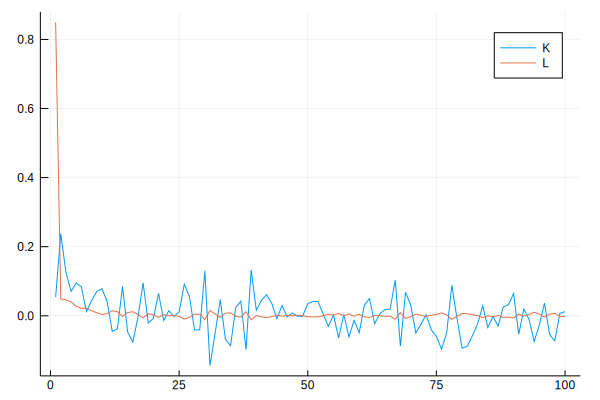

In [73]:
T=100
S= ones(4,T).* [0,0,0,zss]
Z=ones(2,T).*[kss,hss]


for t=2:T
    S[:,t] = P*S[:,t-1]+Q*randn(4,1)
    Z[:,t] = C*Z[1,t] + D*S[:,t]
end

plot([Z[1,:],Z[2,:]],labels = ["K","L"])
